In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as tcr

In [2]:
#reading the json files
users = pd.read_json('/home/amybirdee/hobby_projects/health_first/USERS.json')
events = pd.read_json('/home/amybirdee/hobby_projects/health_first/EVENTS.json')
messages = pd.read_json('/home/amybirdee/hobby_projects/health_first/MESSAGES.json')

# **Data checking and cleaning**

In [3]:
print(users.head())

                                    _id goalsAspiration gender motivation  \
0  {'$oid': '5a2e417806d240124a6185a0'}          medium      F      looks   
1  {'$oid': '5a434efac3a72a107ce35c25'}            high      F     health   
2  {'$oid': '5a4feb9c0fb3cc7e95f244b8'}          medium      F    control   
3  {'$oid': '5a5b956b86ef893f9f93799a'}          medium      F     health   
4  {'$oid': '5a75a465eab9185480e42453'}          medium      F      looks   

    challenge   trigger  age  height  weight churnedAfterSix  
0  motivation     tired   25   156.2    99.3              NA  
1  motivation  emotions   66   154.9    60.3           False  
2  motivation    social   61   174.0    65.8           False  
3  motivation  emotions   55   172.7    80.7           False  
4  motivation  emotions   61   162.6    98.9            True  


In [4]:
#for all tables the user id column is formatted as a dictionary - the below code extracts the values (user id) from these
#dictionaries and converts the data into a Series
users_1 = pd.json_normalize(users['_id'])
events_1 = pd.json_normalize(events['user'])
messages_1 = pd.json_normalize(messages['user'])

In [5]:
print(users_1.head())

                       $oid
0  5a2e417806d240124a6185a0
1  5a434efac3a72a107ce35c25
2  5a4feb9c0fb3cc7e95f244b8
3  5a5b956b86ef893f9f93799a
4  5a75a465eab9185480e42453


In [6]:
#since the user id is now its own series, the below code concatenates this series with the rest of the dataframe
users = pd.concat([users_1, users], axis = 1)
events = pd.concat([events_1, events], axis = 1)
messages = pd.concat([messages_1, messages], axis = 1)

In [7]:
print(messages.head())

                       $oid                                   _id  \
0  5a2e417806d240124a6185a0  {'$oid': '5ce7146a443e670e3c162086'}   
1  5a2e417806d240124a6185a0  {'$oid': '5ce9b6fe443e670e3c1722c9'}   
2  5a2e417806d240124a6185a0  {'$oid': '5ce9b7b5443e670e3c1722d5'}   
3  5a2e417806d240124a6185a0  {'$oid': '5d032f844c772721eb101042'}   
4  5a2e417806d240124a6185a0  {'$oid': '5d03c2144c772721eb104ee1'}   

                                   user messageType  weekNumber  sentiment  \
0  {'$oid': '5a2e417806d240124a6185a0'}       group           0   1.026933   
1  {'$oid': '5a2e417806d240124a6185a0'}       group           0   0.295621   
2  {'$oid': '5a2e417806d240124a6185a0'}       group           0   0.069245   
3  {'$oid': '5a2e417806d240124a6185a0'}     private           3   0.141559   
4  {'$oid': '5a2e417806d240124a6185a0'}     private           3   0.109137   

   questionsAsked  emojisUsed  mentionedScales  mentionedTracker  
0             0.0         0.0              0.0   

In [8]:
#the user id dictionary column is still there after concatenation - the below code deletes this. 
del users['_id']
del events['_id']
del messages['_id']
del events['user']
del messages['user']

In [9]:
#checking column names in users table
users.columns

Index(['$oid', 'goalsAspiration', 'gender', 'motivation', 'challenge',
       'trigger', 'age', 'height', 'weight', 'churnedAfterSix'],
      dtype='object')

In [10]:
#changing column names for users table
users = users.rename(columns = {'$oid': 'user_id', 'goalsAspiration': 'goals', 'churnedAfterSix': 'churned_after_six'})

In [11]:
#checking column names in events table
events.columns

Index(['$oid', 'title', 'weekOnProgramme'], dtype='object')

In [12]:
events.head()

,$oid,title,weekOnProgramme
0,5a2e417806d240124a6185a0,Added new food diary entry,0
1,5a2e417806d240124a6185a0,Sent message,0
2,5a2e417806d240124a6185a0,Sent message,0
3,5a2e417806d240124a6185a0,Sent message,0
4,5a2e417806d240124a6185a0,Read article,1


In [13]:
#changing column names for events table
events = events.rename(columns = {'$oid': 'user_id', 'weekOnProgramme': 'week_on_programme'})

In [14]:
#checking column names in messages table
messages.columns

Index(['$oid', 'messageType', 'weekNumber', 'sentiment', 'questionsAsked',
       'emojisUsed', 'mentionedScales', 'mentionedTracker'],
      dtype='object')

In [15]:
#changing column names for messages table
messages = messages.rename(columns = {'$oid': 'user_id', 'messageType': 'message_type', 'weekNumber': 'week_number', 
                                     'questionsAsked': 'questions_asked', 'emojisUsed': 'emojis_used', 'mentionedScales':
                                     'mentioned_scales', 'mentionedTracker': 'mentioned_tracker'})

In [16]:
#checking all tables turned out as expected with correct columns included and updated column names
print(users.head(3))
print(events.head(3))
print(messages.head(3))

                    user_id   goals gender motivation   challenge   trigger  \
0  5a2e417806d240124a6185a0  medium      F      looks  motivation     tired   
1  5a434efac3a72a107ce35c25    high      F     health  motivation  emotions   
2  5a4feb9c0fb3cc7e95f244b8  medium      F    control  motivation    social   

   age  height  weight churned_after_six  
0   25   156.2    99.3                NA  
1   66   154.9    60.3             False  
2   61   174.0    65.8             False  
                    user_id                       title  week_on_programme
0  5a2e417806d240124a6185a0  Added new food diary entry                  0
1  5a2e417806d240124a6185a0                Sent message                  0
2  5a2e417806d240124a6185a0                Sent message                  0
                    user_id message_type  week_number  sentiment  \
0  5a2e417806d240124a6185a0        group            0   1.026933   
1  5a2e417806d240124a6185a0        group            0   0.295621   
2  5a2e

In [17]:
#checking datatypes for users table - goals and challenge include null entries, age, height and weight are integers/floats 
#so no need to convert
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            438 non-null    object 
 1   goals              404 non-null    object 
 2   gender             438 non-null    object 
 3   motivation         438 non-null    object 
 4   challenge          405 non-null    object 
 5   trigger            438 non-null    object 
 6   age                438 non-null    int64  
 7   height             438 non-null    float64
 8   weight             438 non-null    float64
 9   churned_after_six  438 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 34.3+ KB


In [18]:
#checking datatypes for events table - all cells are non-null, week_on_programme is an integer so no need to convert
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56590 entries, 0 to 56589
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            56590 non-null  object
 1   title              56590 non-null  object
 2   week_on_programme  56590 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [19]:
#checking datatypes for messages table - columns 4-7 include null entries, integer/float columns are correct so no need to 
#convert
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23711 entries, 0 to 23710
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            23711 non-null  object 
 1   message_type       23711 non-null  object 
 2   week_number        23711 non-null  int64  
 3   sentiment          23711 non-null  float64
 4   questions_asked    22046 non-null  float64
 5   emojis_used        22046 non-null  float64
 6   mentioned_scales   22046 non-null  float64
 7   mentioned_tracker  22046 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.4+ MB


In [20]:
#finding the null values in users table
users_null = users[users['goals'].isnull()]
print(users_null.head())

                     user_id goals gender motivation   challenge   trigger  \
8   5af86dd57e656f2faca52e19   NaN      F      looks  motivation    social   
55  5cba40489203684bd4c4e04f   NaN      F      looks         NaN     other   
62  5cbdf5854a95711131f8fe65   NaN      F      looks         NaN  emotions   
64  5cbea7fd4a95711131f93b7d   NaN      F     health         NaN     tired   
68  5cc3ff11aa2be51676641ea5   NaN      F     health         NaN     other   

    age  height  weight churned_after_six  
8    68   170.0    65.0             False  
55   45   155.0    98.4                NA  
62   45   165.0    78.0             False  
64   37   164.0   122.0              True  
68   72   157.5    81.2             False  


In [21]:
#the goals and challenge columns take categorical values so will fill NaN values with 'not answered' rather than creating 
#an 'other' category for goals and inflating the existing 'other' category for challenge
users['goals'].fillna('not answered', inplace = True)
users['challenge'].fillna('not answered', inplace = True)

In [22]:
#the null columns in the messages table are all of datatype float so I will assume that null means the users didn't ask
#any questions or use any emojis - filling NaN values with 0.0
messages.fillna(0.0, inplace = True)

In [23]:
#replacing true/false with 'churn'/'no churn' in churn column to avoid potential issues with using boolean values later on
users = users.replace([False, True], ['No churn', 'Churn'])

In [24]:
#checking key stats in users table - average age of users is 47, main motivation to join Health First is to improve looks
#biggest challenge is motivation, biggest trigger is stress, most users do not churn
users.describe(include = 'all')

,user_id,goals,gender,motivation,challenge,trigger,age,height,weight,churned_after_six
count,438,438,438,438,438,438,438.000000,438.000000,438.000000,438
unique,438,4,2,5,6,8,NaN,NaN,NaN,3
top,5cd5260098495812a5292cd9,medium,F,looks,motivation,stress,NaN,NaN,NaN,No churn
freq,1,272,410,172,207,122,NaN,NaN,NaN,390
mean,NaN,NaN,NaN,NaN,NaN,NaN,47.344749,168.716667,93.737416,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,15.053295,11.227582,20.648107,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,149.900000,57.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,159.000000,79.043750,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,48.000000,170.100000,90.300000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,61.000000,176.000000,105.687000,NaN


In [25]:
#checking key stats in events table - over 50,000 users included so many users had many events
events.describe(include = 'all')

,user_id,title,week_on_programme
count,56590,56590,56590.000000
unique,421,5,NaN
top,5cae4be5dfe728715c174f4c,Sent message,NaN
freq,894,23821,NaN
mean,NaN,NaN,2.405849
std,NaN,NaN,1.715860
min,NaN,NaN,0.000000
25%,NaN,NaN,1.000000
50%,NaN,NaN,2.000000
75%,NaN,NaN,4.000000


In [26]:
#checking key stats in messages table - over 20,000 users included so many users sent many messages - mainly to the group
messages.describe(include = 'all')

,user_id,message_type,week_number,sentiment,questions_asked,emojis_used,mentioned_scales,mentioned_tracker
count,23711,23711,23711.000000,23711.000000,23711.000000,23711.000000,23711.000000,23711.000000
unique,414,2,NaN,NaN,NaN,NaN,NaN,NaN
top,5cae4be5dfe728715c174f4c,group,NaN,NaN,NaN,NaN,NaN,NaN
freq,680,19569,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.341276,0.155524,0.152461,0.237527,0.018009,0.005187
std,NaN,NaN,1.680317,0.245551,0.471269,0.609438,0.144535,0.075279
min,NaN,NaN,0.000000,-1.570146,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2.000000,0.123490,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,3.000000,0.288675,0.000000,0.000000,0.000000,0.000000


# **Exploratory data analysis - users table**

In [27]:
#grouping data to see how many customers churn and also dropping the row indexed at 2 as this contains the 'NA' variable
churn = users.groupby('churned_after_six').size().sort_values(ascending = False).to_frame().reset_index().\
rename(columns = {0: 'churn_count'})
churn = churn.drop([2]).reset_index(drop = True)
churn

,churned_after_six,churn_count
0,No churn,390
1,Churn,38


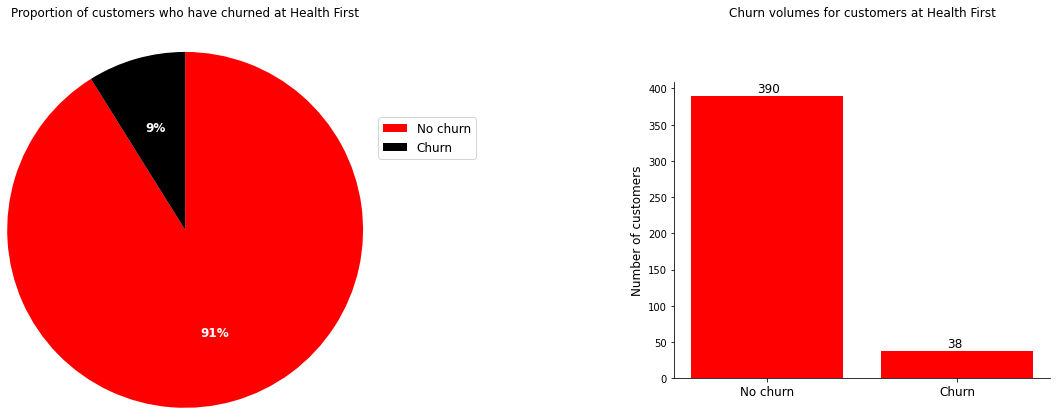

In [28]:
#creating charts to show churn - 91% of customers don't churn!

fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(1, 2, 1)    
_, _, autotexts = (plt.pie(churn['churn_count'], colors = ['red', 'black'], radius = 1.5, autopct = ('%.0f%%'), \
                           counterclock = False, startangle = -270))

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = ['No churn', 'Churn'], loc = 'upper right', bbox_to_anchor = (1.5, 0.9), fontsize = 12)

#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)

#the y = 1.2 shifts the title up above the chart 
plt.title('Proportion of customers who have churned at Health First', y = 1.2, fontsize = 12)

ax = plt.subplot(1, 2, 2)
plt.bar(churn['churned_after_six'], churn['churn_count'], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding labels to the bars
bars = plt.bar(churn['churned_after_six'], churn['churn_count'], color = 'red')

#adding 0.35 shifts the label to the right so the alingment is more centered. Adding 5 to yval shifts the values upwards
#upwards slightly
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.35, yval + 5, yval, fontsize = 12)

plt.xticks(churn['churned_after_six'], labels = ['No churn', 'Churn'], fontsize = 12)
plt.ylabel('Number of customers', fontsize = 12)
plt.title('Churn volumes for customers at Health First', fontsize = 12, y = 1.2)
plt.tight_layout()
plt.savefig('churn_proportions_and_volumes')

plt.subplots_adjust(wspace = 0.8)

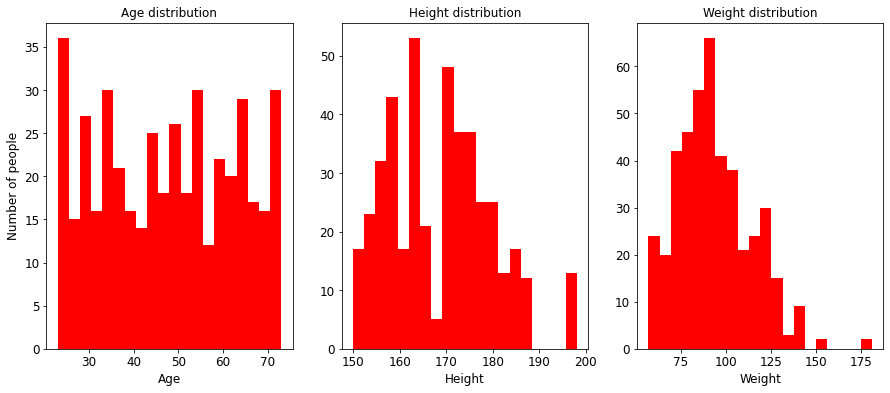

In [29]:
#checking age, height and weight distributions - no real pattern in the age data, height shows a relatively normal
#distribution, weight has a slight right skew which one would expect at a weight loss company

plt.figure(figsize = (15,6))

ax = plt.subplot(1, 3, 1)
users['age'].hist(bins = 20, color = 'red')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Number of people', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.title('Age distribution', fontsize = 12)
plt.grid(None)
plt.savefig('Age - histogram', bbox_inches = 'tight')

ax = plt.subplot(1, 3, 2)
users['height'].hist(bins = 20, color = 'red')
plt.xlabel('Height', fontsize = 12)
plt.ylabel('')
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.title('Height distribution', fontsize = 12)
plt.grid(None)
plt.savefig('Height - histogram', bbox_inches = 'tight')

ax = plt.subplot(1, 3, 3)
users['weight'].hist(bins = 20, color = 'red')
plt.xlabel('Weight', fontsize = 12)
plt.ylabel('')
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.title('Weight distribution', fontsize = 12)
plt.grid(None)
plt.savefig('Weight - histogram', bbox_inches = 'tight')


In [30]:
#grouping age and churn data and removing NAs - will then create age ranges to see which age range churns the most
age = users.groupby(['age', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
age = age[age.churned_after_six != 'NA']
age.head()

,age,churned_after_six,count
0,23,Churn,2
1,23,No churn,11
3,24,No churn,13
4,25,Churn,1
6,25,No churn,7


In [31]:
#creating column for age ranges, ages range from 23-73
#grouping ages into 6 groups for barplot using pd.cut to cut the age column
bins = [20, 30, 40, 50, 60, 70, np.inf]
labels = ['<30', '30-40', '41-50', '51-60', '61-70', '70+']
age['age_range'] = pd.cut(age['age'], bins = bins, labels = labels)
age.head()

,age,churned_after_six,count,age_range
0,23,Churn,2,<30
1,23,No churn,11,<30
3,24,No churn,13,<30
4,25,Churn,1,<30
6,25,No churn,7,<30


In [32]:
#pivoting the data for chart - this has also summed the age column which I will drop in the next cell
age_pivot = age.pivot_table(columns = 'churned_after_six',
                           index = 'age_range',
                           aggfunc = 'sum').reset_index()
age_pivot

age_range   age          count         
churned_after_six           Churn No churn Churn No churn
0                       <30   135      212     8       67
1                     30-40   213      355     8       73
2                     41-50   272      455     8       74
3                     51-60   221      555     4       78
4                     61-70   319      585     6       74
5                       70+   145      216     4       24

In [33]:
#dropping the age column to avoid confusion
age_pivot = age_pivot.drop(['age'], axis = 1)

/home/amybirdee/.local/lib/python3.6/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [34]:
#the churn and no churn labels were previously subtitles which I couldn't access for the chart. The below code joins the
#title and subtitle
age_pivot.columns = list(map('_'.join, age_pivot.columns))
age_pivot

,age_range_,count_Churn,count_No churn
0,<30,8,67
1,30-40,8,73
2,41-50,8,74
3,51-60,4,78
4,61-70,6,74
5,70+,4,24


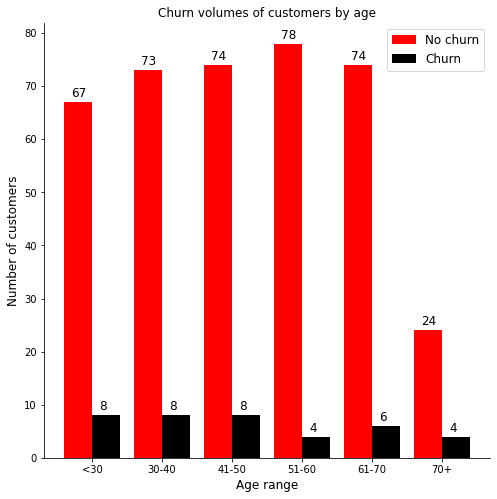

In [35]:
#plotting bar chart - churn rates seem to be pretty stable across age ranges
num_bars = 6
width = 0.4

age_bars = np.arange(num_bars)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

bar_1 = ax.bar(age_bars, age_pivot['count_No churn'], width, color = 'red', label = 'No churn')
bar_2 = ax.bar(age_bars + width, age_pivot['count_Churn'], width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels
for bar in bar_1:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.1, yval + 1, yval, fontsize = 12)
    
for bar in bar_2:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.1, yval + 1, yval, fontsize = 12)


ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('Age range', fontsize = 12)
ax.set_xticks(age_bars + width / 2)
ax.set_xticklabels(age_pivot.age_range_)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers by age', fontsize = 12)
plt.savefig('churn_by_age')

In [36]:
#grouping height and churn data and removing NAs - will then create height ranges to see which height range churns the most
height = users.groupby(['height', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
height = height[height.churned_after_six != 'NA']
height.head()

,height,churned_after_six,count
0,149.9,No churn,7
1,152.0,No churn,10
2,152.4,Churn,2
3,152.4,No churn,13
4,153.0,Churn,1


In [37]:
#creating column for height ranges, height range from 149-198 cm
#grouping heights into 6 groups for barplot using pd.cut to cut the height column
bins = [140, 150, 160, 170, 180, 190, np.inf]
labels = ['<150', '150-160', '161-170', '171-180', '181-190', '190+']
height['height_range'] = pd.cut(height['height'], bins = bins, labels = labels)
height.head()

,height,churned_after_six,count,height_range
0,149.9,No churn,7,<150
1,152.0,No churn,10,150-160
2,152.4,Churn,2,150-160
3,152.4,No churn,13,150-160
4,153.0,Churn,1,150-160


In [38]:
#pivoting the data for chart - this has also summed the height column which I will drop in the next cell
height_pivot = height.pivot_table(columns = 'churned_after_six',
                           index = 'height_range',
                           aggfunc = 'sum').reset_index()
height_pivot

height_range count           height         
churned_after_six              Churn No churn   Churn No churn
0                         <150   NaN      7.0     NaN    149.9
1                      150-160   7.0    106.0   780.7   1558.8
2                      161-170   8.0     87.0   985.1   1810.4
3                      171-180  17.0    129.0  2094.4   2785.9
4                      181-190   6.0     48.0   736.6    736.6
5                         190+   NaN     13.0     NaN    198.1

In [39]:
#replacing NaNs with 0
height_pivot = height_pivot.replace(np.nan, 0.0)

In [40]:
#dropping the height column to avoid confusion
height_pivot = height_pivot.drop(['height'], axis = 1)

/home/amybirdee/.local/lib/python3.6/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [41]:
#the churn and no churn labels were previously subtitles which I couldn't access for the chart. The below code joins the
#title and subtitle
height_pivot.columns = list(map('_'.join, height_pivot.columns))
height_pivot

,height_range_,count_Churn,count_No churn
0,<150,0.0,7.0
1,150-160,7.0,106.0
2,161-170,8.0,87.0
3,171-180,17.0,129.0
4,181-190,6.0,48.0
5,190+,0.0,13.0


In [42]:
#converting height data to integers for chart labels
height_pivot['count_Churn'] = height_pivot['count_Churn'].astype(int)
height_pivot['count_No churn'] = height_pivot['count_No churn'].astype(int)

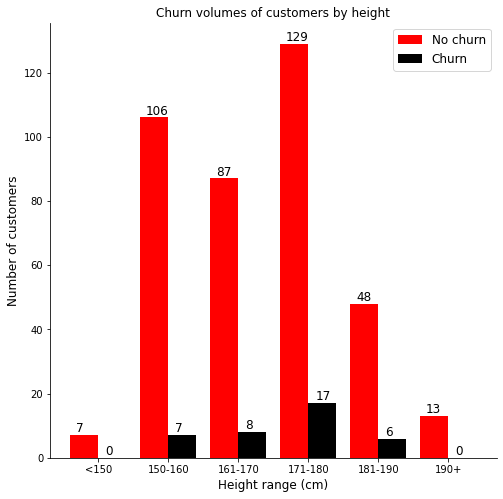

In [43]:
#plotting bar chart - churn rates highest in 171-180 group but this is likely because there are more people in this group
num_bars = 6
width = 0.4

height_bars = np.arange(num_bars)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

bar_1 = ax.bar(height_bars, height_pivot['count_No churn'], width, color = 'red', label = 'No churn')
bar_2 = ax.bar(height_bars + width, height_pivot['count_Churn'], width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels
for bar in bar_1:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.08, yval + 1, yval, fontsize = 12)
    
for bar in bar_2:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.1, yval + 1, yval, fontsize = 12)


ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('Height range (cm)', fontsize = 12)
ax.set_xticks(height_bars + width / 2)
ax.set_xticklabels(height_pivot.height_range_)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers by height', fontsize = 12)
plt.savefig('churn_by_height')

In [44]:
#grouping weight and churn data and removing NAs - will then create weight ranges to see which weight range churns the most
weight = users.groupby(['weight', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
weight = weight[weight.churned_after_six != 'NA']
weight.head()

,weight,churned_after_six,count
1,57.606,No churn,3
2,58.100,Churn,1
3,58.100,No churn,1
4,59.000,No churn,1
5,59.900,No churn,4


In [45]:
#creating column for weight ranges, weight range from 57-181 kg
#grouping weights into 8 groups for barplot using pd.cut to cut the weight column
bins = [40, 60, 80, 100, 120, 140, 160, 180, np.inf]
labels = ['<60', '60-80', '81-100', '101-120', '121-140', '141-160', '160-180', '180+']
weight['weight_range'] = pd.cut(weight['weight'], bins = bins, labels = labels)
weight.head()

,weight,churned_after_six,count,weight_range
1,57.606,No churn,3,<60
2,58.100,Churn,1,<60
3,58.100,No churn,1,<60
4,59.000,No churn,1,<60
5,59.900,No churn,4,<60


In [46]:
#pivoting the data for chart - this has also summed the weight column which I will drop in the next cell
weight_pivot = weight.pivot_table(columns = 'churned_after_six',
                           index = 'weight_range',
                           aggfunc = 'sum').reset_index()
weight_pivot

weight_range count            weight          
churned_after_six              Churn No churn    Churn  No churn
0                          <60   1.0      9.0    58.10   234.606
1                        60-80   7.0     96.0   407.90  3092.685
2                       81-100  16.0    155.0  1259.33  5742.024
3                      101-120   9.0     77.0   963.60  3916.092
4                      121-140   5.0     46.0   498.70  2677.957
5                      141-160   NaN      5.0      NaN   296.600
6                         180+   NaN      2.0      NaN   181.000

In [47]:
#filling NaNs with 0
weight_pivot = weight_pivot.replace(np.nan, 0.0)

In [48]:
#dropping the weight column to avoid confusion
weight_pivot = weight_pivot.drop(['weight'], axis = 1)

/home/amybirdee/.local/lib/python3.6/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [49]:
#the churn and no churn labels were previously subtitles which I couldn't access for the chart. The below code joins the
#title and subtitle
weight_pivot.columns = list(map('_'.join, weight_pivot.columns))
weight_pivot

,weight_range_,count_Churn,count_No churn
0,<60,1.0,9.0
1,60-80,7.0,96.0
2,81-100,16.0,155.0
3,101-120,9.0,77.0
4,121-140,5.0,46.0
5,141-160,0.0,5.0
6,180+,0.0,2.0


In [50]:
#converting weight data to integers for chart labels
weight_pivot['count_Churn'] = weight_pivot['count_Churn'].astype(int)
weight_pivot['count_No churn'] = weight_pivot['count_No churn'].astype(int)

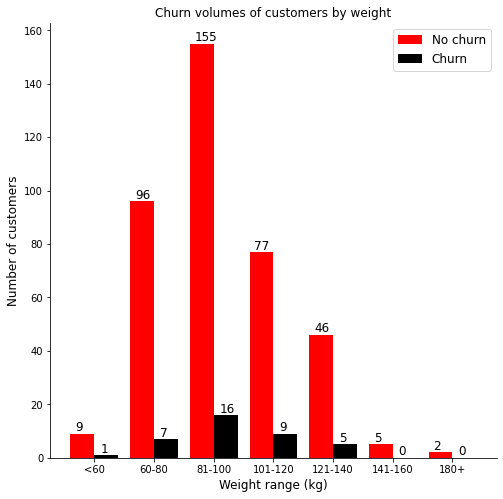

In [51]:
#plotting bar chart - churn rates are zero for those with the largest weight - good news as these customers need the 
#program the most

num_bars = 7
width = 0.4

weight_bars = np.arange(num_bars)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

bar_1 = ax.bar(weight_bars, weight_pivot['count_No churn'], width, color = 'red', label = 'No churn')
bar_2 = ax.bar(weight_bars + width, weight_pivot['count_Churn'], width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels
for bar in bar_1:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.08, yval + 1, yval, fontsize = 12)
    
for bar in bar_2:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.1, yval + 1, yval, fontsize = 12)


ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('Weight range (kg)', fontsize = 12)
ax.set_xticks(weight_bars + width / 2)
ax.set_xticklabels(weight_pivot.weight_range_)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers by weight', fontsize = 12)
plt.savefig('churn_by_weight')

In [52]:
#grouping goals and churn data and removing NAs
goals = users.groupby(['goals', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
goals = goals[goals.churned_after_six != 'NA']
goals.head()

,goals,churned_after_six,count
0,high,Churn,5
2,high,No churn,62
3,low,Churn,6
5,low,No churn,57
6,medium,Churn,24


In [53]:
#pivoting the data for chart
goals_pivot = goals.pivot_table(columns = 'churned_after_six',
                           index = 'goals',
                           aggfunc = 'sum').reset_index()
goals_pivot

goals count         
churned_after_six               Churn No churn
0                          high     5       62
1                           low     6       57
2                        medium    24      241
3                  not answered     3       30

In [54]:
#creating one column title
goals_pivot.columns = list(map('_'.join, goals_pivot.columns))
goals_pivot

,goals_,count_Churn,count_No churn
0,high,5,62
1,low,6,57
2,medium,24,241
3,not answered,3,30


In [55]:
#adding a total column for chart and sorting it by total. Initially I used 'margins = True' in the pivot code to get a total 
#column but this gave me a row total as well which was interfering with my chart
goals_pivot['total'] = goals_pivot['count_Churn'] + goals_pivot['count_No churn']
goals_pivot.sort_values(by = 'total', ascending = False, inplace = True)

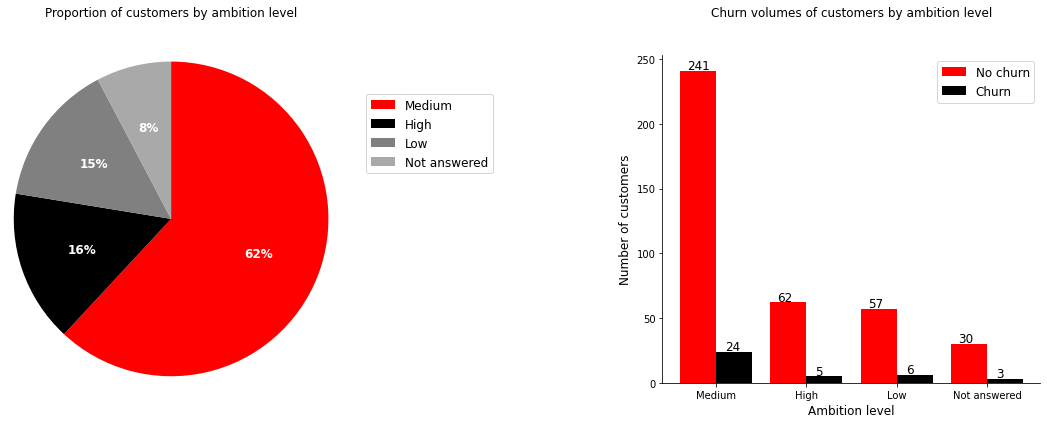

In [56]:
#Creating charts - those with medium level goals are more likely to churn but there are also more people in this group. 
#Numbers are similar for those with high or low ambitions

fig = plt.figure(figsize = (15, 6))
colors = ['red', 'black', 'grey','darkgrey']
labels = ['Medium', 'High', 'Low', 'Not answered']

ax = plt.subplot(1, 2, 1)
_, _, autotexts = (plt.pie(goals_pivot['total'], colors = colors, radius = 1.2, autopct = ('%.0f%%'), \
                                       counterclock = False, startangle = -270))
                                       
#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)
    
plt.legend(labels = labels, loc = 'best', bbox_to_anchor = (1.5, 0.9), fontsize = 12)
    
plt.title('Proportion of customers by ambition level', y = 1.1)

#second subplot
ax = plt.subplot(1, 2, 2)
num_bars = 4
width = 0.4

goals_bars = np.arange(num_bars)

bar_1 = ax.bar(goals_bars, goals_pivot['count_No churn'], width, color = 'red', label = 'No churn')
bar_2 = ax.bar(goals_bars + width, goals_pivot['count_Churn'], width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels
for bar in bar_1:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.08, yval + 1.3, yval, fontsize = 12)
    
for bar in bar_2:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.1, yval + 1.3, yval, fontsize = 12)


ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('Ambition level', fontsize = 12)
ax.set_xticks(goals_bars + width / 2)
ax.set_xticklabels(labels)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers by ambition level', fontsize = 12, y = 1.1)

plt.tight_layout()
plt.savefig('churn_by_ambition')

plt.subplots_adjust(wspace = 0.8)

In [57]:
#grouping gender and churn data and removing NAs
gender = users.groupby(['gender', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
gender = gender[gender.churned_after_six != 'NA']
gender.head()

,gender,churned_after_six,count
0,F,Churn,34
2,F,No churn,367
3,M,Churn,4
5,M,No churn,23


In [58]:
#pivoting the data for chart
gender_pivot = gender.pivot_table(columns = 'churned_after_six',
                           index = 'gender',
                           aggfunc = 'sum').reset_index()
gender_pivot

gender count         
churned_after_six        Churn No churn
0                      F    34      367
1                      M     4       23

In [59]:
#creating one column title
gender_pivot.columns = list(map('_'.join, gender_pivot.columns))
gender_pivot

,gender_,count_Churn,count_No churn
0,F,34,367
1,M,4,23


In [60]:
#adding a total column for chart and sorting it by total
gender_pivot['total'] = gender_pivot['count_Churn'] + gender_pivot['count_No churn']
gender_pivot.sort_values(by = 'total', ascending = False, inplace = True)
gender_pivot

,gender_,count_Churn,count_No churn,total
0,F,34,367,401
1,M,4,23,27


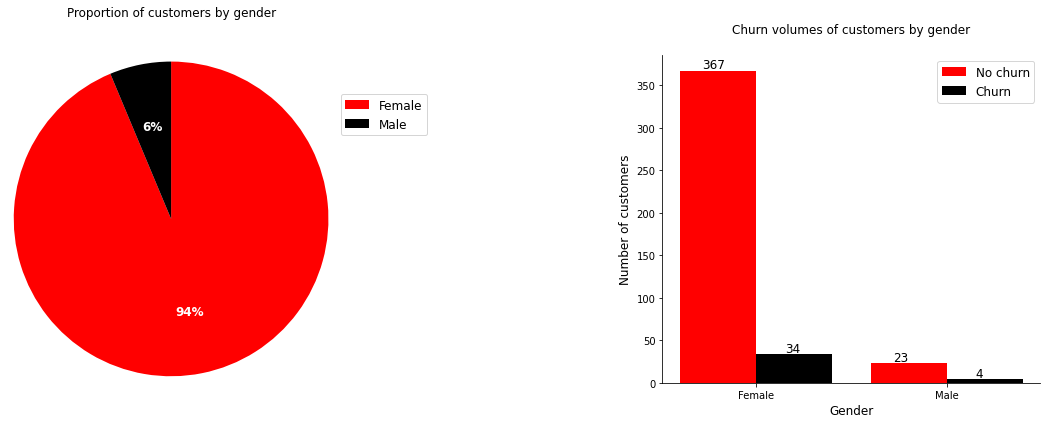

In [61]:
#Creating charts - females by far make up the most customers at Health First but their churn rate is lower than males - 
#8% of females churn compared to 15% of males 

fig = plt.figure(figsize = (15, 6))
colors = ['red', 'black']
labels = ['Female', 'Male']

ax = plt.subplot(1, 2, 1)
_, _, autotexts = (plt.pie(gender_pivot['total'], colors = colors, radius = 1.2, autopct = ('%.0f%%'), \
                                       counterclock = False, startangle = -270))
                                       
#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)
    
plt.legend(labels = labels, loc = 'best', bbox_to_anchor = (1.3, 0.9), fontsize = 12)
    
plt.title('Proportion of customers by gender', y = 1.1)

#second subplot
ax = plt.subplot(1, 2, 2)
num_bars = 2
width = 0.4

gender_bars = np.arange(num_bars)

bar_1 = ax.bar(gender_bars, gender_pivot['count_No churn'], width, color = 'red', label = 'No churn')
bar_2 = ax.bar(gender_bars + width, gender_pivot['count_Churn'], width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels
for bar in bar_1:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.12, yval + 2.5, yval, fontsize = 12)
    
for bar in bar_2:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.15, yval + 2.5, yval, fontsize = 12)


ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('Gender', fontsize = 12)
ax.set_xticks(gender_bars + width / 2)
ax.set_xticklabels(labels)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers by gender', fontsize = 12, y = 1.05)

plt.tight_layout()
plt.savefig('churn_by_gender')

plt.subplots_adjust(wspace = 0.8)

In [62]:
#grouping motivation and churn data and removing NAs
motivation = users.groupby(['motivation', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
motivation = motivation[motivation.churned_after_six != 'NA']
motivation.head()

,motivation,churned_after_six,count
0,control,Churn,5
2,control,No churn,68
3,fitness,Churn,6
5,fitness,No churn,51
6,health,Churn,10


In [63]:
#pivoting the data for chart
motivation_pivot = motivation.pivot_table(columns = 'churned_after_six',
                           index = 'motivation',
                           aggfunc = 'sum').reset_index()
motivation_pivot

motivation count         
churned_after_six            Churn No churn
0                    control     5       68
1                    fitness     6       51
2                     health    10      115
3                      looks    15      151
4                      other     2        5

In [64]:
#creating one column title
motivation_pivot.columns = list(map('_'.join, motivation_pivot.columns))
motivation_pivot

,motivation_,count_Churn,count_No churn
0,control,5,68
1,fitness,6,51
2,health,10,115
3,looks,15,151
4,other,2,5


In [65]:
#adding a total column for chart and sorting it by total
motivation_pivot['total'] = motivation_pivot['count_Churn'] + motivation_pivot['count_No churn']
motivation_pivot.sort_values(by = 'total', ascending = False, inplace = True)
motivation_pivot

,motivation_,count_Churn,count_No churn,total
3,looks,15,151,166
2,health,10,115,125
0,control,5,68,73
1,fitness,6,51,57
4,other,2,5,7


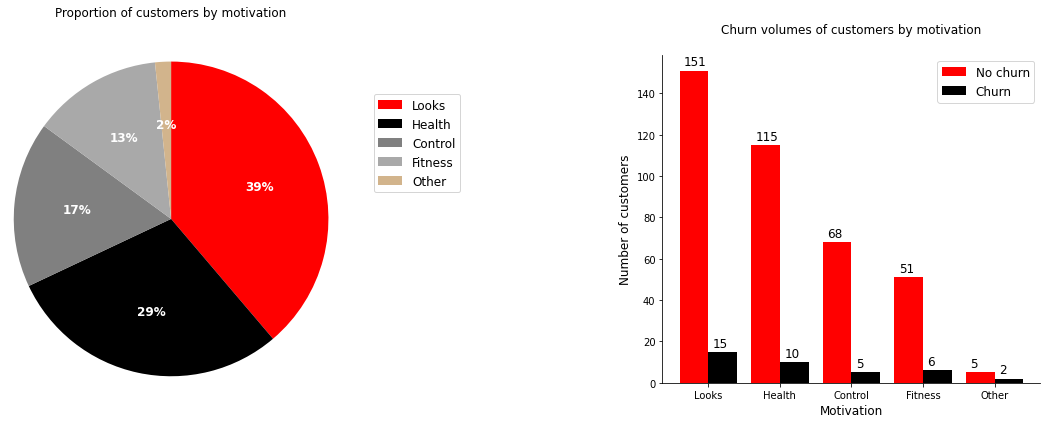

In [66]:
#Creating charts - most people say looks are their motivation for joining, those who say fitness is their motivation
#have the highest churn rate at 11%, follwed closely by looks with 9% (ignoring 'other') 

fig = plt.figure(figsize = (15, 6))
colors = ['red', 'black', 'grey','darkgrey', 'tan']
labels = ['Looks', 'Health', 'Control', 'Fitness', 'Other']

ax = plt.subplot(1, 2, 1)
_, _, autotexts = (plt.pie(motivation_pivot['total'], colors = colors, radius = 1.2, autopct = ('%.0f%%'), \
                                       counterclock = False, startangle = -270))
                                       
#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)
    
plt.legend(labels = labels, loc = 'best', bbox_to_anchor = (1.4, 0.9), fontsize = 12)
    
plt.title('Proportion of customers by motivation', y = 1.1)

#second subplot
ax = plt.subplot(1, 2, 2)
num_bars = 5
width = 0.4

motivation_bars = np.arange(num_bars)

bar_1 = ax.bar(motivation_bars, motivation_pivot['count_No churn'], width, color = 'red', label = 'No churn')
bar_2 = ax.bar(motivation_bars + width, motivation_pivot['count_Churn'], width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels
for bar in bar_1:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.06, yval + 2.5, yval, fontsize = 12)
    
for bar in bar_2:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.06, yval + 2.5, yval, fontsize = 12)


ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('Motivation', fontsize = 12)
ax.set_xticks(motivation_bars + width / 2)
ax.set_xticklabels(labels)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers by motivation', fontsize = 12, y = 1.05)

plt.tight_layout()
plt.savefig('churn_by_motivation')

plt.subplots_adjust(wspace = 0.8)

In [67]:
#grouping challenge and churn data and removing NAs
challenge = users.groupby(['challenge', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
challenge = challenge[challenge.churned_after_six != 'NA']
challenge.head()

,challenge,churned_after_six,count
0,food,Churn,7
2,food,No churn,79
3,information,Churn,1
4,information,No churn,11
5,motivation,Churn,21


In [68]:
#pivoting the data for chart
challenge_pivot = challenge.pivot_table(columns = 'churned_after_six',
                           index = 'challenge',
                           aggfunc = 'sum').reset_index()
challenge_pivot

challenge count         
churned_after_six               Churn No churn
0                          food     7       79
1                   information     1       11
2                    motivation    21      180
3                  not answered     3       29
4                         other     1        7
5                          time     5       84

In [69]:
#creating one column title
challenge_pivot.columns = list(map('_'.join, challenge_pivot.columns))
challenge_pivot

,challenge_,count_Churn,count_No churn
0,food,7,79
1,information,1,11
2,motivation,21,180
3,not answered,3,29
4,other,1,7
5,time,5,84


In [70]:
#adding a total column for chart and sorting it by total
challenge_pivot['total'] = challenge_pivot['count_Churn'] + challenge_pivot['count_No churn']
challenge_pivot.sort_values(by = 'total', ascending = False, inplace = True)
challenge_pivot

,challenge_,count_Churn,count_No churn,total
2,motivation,21,180,201
5,time,5,84,89
0,food,7,79,86
3,not answered,3,29,32
1,information,1,11,12
4,other,1,7,8


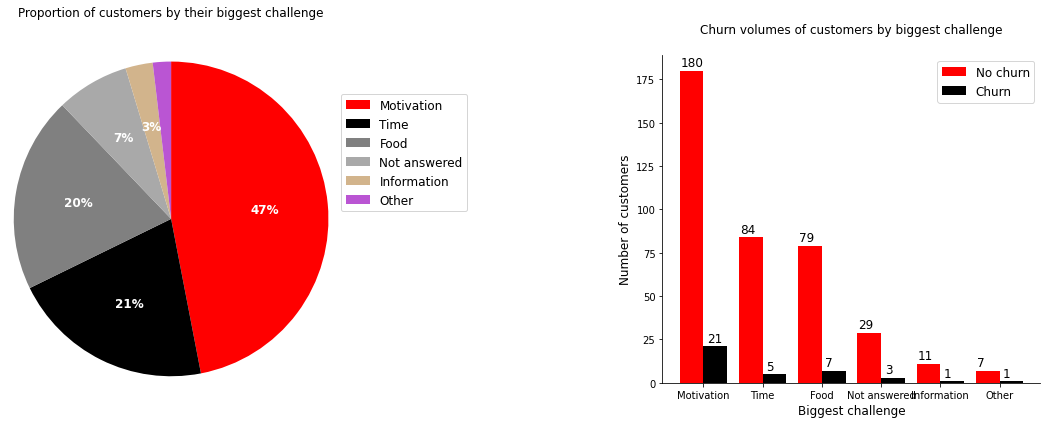

In [71]:
#Creating charts - most people say motivation is their biggest challenge and this group also has the highest churn rate at
#10% (ignoring 'other')

fig = plt.figure(figsize = (15, 6))
colors = ['red', 'black', 'grey','darkgrey', 'tan', 'mediumorchid']
labels = ['Motivation', 'Time', 'Food', 'Not answered', 'Information', 'Other']

#some percentages were overlapping so including this function to only include a percent label if value is greater than 2%
def my_autopct(pct):
    return ('%.0f%%' % pct) if pct > 2 else ''

ax = plt.subplot(1, 2, 1)
_, _, autotexts = (plt.pie(challenge_pivot['total'], colors = colors, radius = 1.2, autopct = my_autopct, \
                                       counterclock = False, startangle = -270))
                                       
#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)
    
plt.legend(labels = labels, loc = 'best', bbox_to_anchor = (1.0, 0.9), fontsize = 12)
    
plt.title('Proportion of customers by their biggest challenge', y = 1.1)

#second subplot
ax = plt.subplot(1, 2, 2)
num_bars = 6
width = 0.4

challenge_bars = np.arange(num_bars)

bar_1 = ax.bar(challenge_bars, challenge_pivot['count_No churn'], width, color = 'red', label = 'No churn')
bar_2 = ax.bar(challenge_bars + width, challenge_pivot['count_Churn'], width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels
for bar in bar_1:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.015, yval + 2.5, yval, fontsize = 12)
    
for bar in bar_2:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.06, yval + 2.5, yval, fontsize = 12)


ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('Biggest challenge', fontsize = 12)
ax.set_xticks(challenge_bars + width / 2)
ax.set_xticklabels(labels)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers by biggest challenge', fontsize = 12, y = 1.05)

plt.tight_layout()
plt.savefig('churn_by_challenge')

plt.subplots_adjust(wspace = 0.8)

In [72]:
#grouping trigger and churn data and removing NAs
trigger = users.groupby(['trigger', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
trigger = trigger[trigger.churned_after_six != 'NA']
trigger.head()

,trigger,churned_after_six,count
0,emotions,Churn,8
2,emotions,No churn,55
3,other,Churn,1
5,other,No churn,19
6,routine,Churn,2


In [73]:
#pivoting the data for chart
trigger_pivot = trigger.pivot_table(columns = 'churned_after_six',
                           index = 'trigger',
                           aggfunc = 'sum').reset_index()
trigger_pivot

trigger count         
churned_after_six              Churn No churn
0                     emotions   8.0     55.0
1                        other   1.0     19.0
2                      routine   2.0      7.0
3                       social   8.0    113.0
4                       stress  11.0    108.0
5                  supermarket   NaN     10.0
6                        tired   8.0     69.0
7                       treats   NaN      9.0

In [74]:
#replacing NaNs with 0
trigger_pivot = trigger_pivot.replace(np.nan, 0.0)

In [75]:
#creating one column title
trigger_pivot.columns = list(map('_'.join, trigger_pivot.columns))
trigger_pivot

,trigger_,count_Churn,count_No churn
0,emotions,8.0,55.0
1,other,1.0,19.0
2,routine,2.0,7.0
3,social,8.0,113.0
4,stress,11.0,108.0
5,supermarket,0.0,10.0
6,tired,8.0,69.0
7,treats,0.0,9.0


In [76]:
#converting data to integers for chart labels
trigger_pivot['count_Churn'] = trigger_pivot['count_Churn'].astype(int)
trigger_pivot['count_No churn'] = trigger_pivot['count_No churn'].astype(int)

In [77]:
#adding a total column for chart and sorting it by total
trigger_pivot['total'] = trigger_pivot['count_Churn'] + trigger_pivot['count_No churn']
trigger_pivot.sort_values(by = 'total', ascending = False, inplace = True)
trigger_pivot

,trigger_,count_Churn,count_No churn,total
3,social,8,113,121
4,stress,11,108,119
6,tired,8,69,77
0,emotions,8,55,63
1,other,1,19,20
5,supermarket,0,10,10
2,routine,2,7,9
7,treats,0,9,9


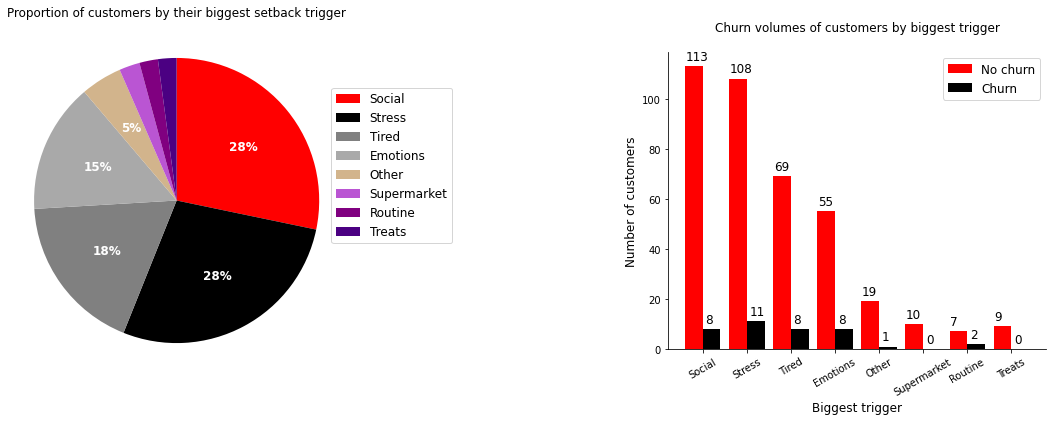

In [78]:
#Creating charts - socialising and stress are the biggest triggers. Routine has the highest churn rate but numbers are small.
#Stress, tirednes and emotions all have high churn rates so many triggers are mental triggers

fig = plt.figure(figsize = (15, 6))
colors = ['red', 'black', 'grey','darkgrey', 'tan', 'mediumorchid', 'purple', 'indigo']
labels = ['Social', 'Stress', 'Tired', 'Emotions', 'Other', 'Supermarket', 'Routine', 'Treats']

#only including a percent label if value is greater than 3%
def my_autopct(pct):
    return ('%.0f%%' % pct) if pct > 3 else ''

ax = plt.subplot(1, 2, 1)
_, _, autotexts = (plt.pie(trigger_pivot['total'], colors = colors, radius = 1.2, autopct = my_autopct, \
                                       counterclock = False, startangle = -270))
                                       
#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)
    
plt.legend(labels = labels, loc = 'best', bbox_to_anchor = (1.0, 0.9), fontsize = 12)
    
plt.title('Proportion of customers by their biggest setback trigger', y = 1.1)

#second subplot
ax = plt.subplot(1, 2, 2)
num_bars = 8
width = 0.4

trigger_bars = np.arange(num_bars)

bar_1 = ax.bar(trigger_bars, trigger_pivot['count_No churn'], width, color = 'red', label = 'No churn')
bar_2 = ax.bar(trigger_bars + width, trigger_pivot['count_Churn'], width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels
for bar in bar_1:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.015, yval + 2.5, yval, fontsize = 12)
    
for bar in bar_2:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.06, yval + 2.5, yval, fontsize = 12)


ax.set_ylabel('Number of customers', fontsize = 12)
ax.set_xlabel('Biggest trigger', fontsize = 12)
ax.set_xticks(trigger_bars + width / 2)
ax.set_xticklabels(labels, rotation = 30)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers by biggest trigger', fontsize = 12, y = 1.05)

plt.tight_layout()
plt.savefig('churn_by_trigger')

plt.subplots_adjust(wspace = 0.8)

# **Exploratory data analysis - messages table**

In [79]:
#merging users and messages table
users_messages = users.merge(messages, how = 'right', left_on = 'user_id', right_on = 'user_id')
users_messages

,user_id,goals,gender,motivation,challenge,trigger,age,height,weight,churned_after_six,message_type,week_number,sentiment,questions_asked,emojis_used,mentioned_scales,mentioned_tracker
0,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NA,group,0,1.026933,0.0,0.0,0.0,0.0
1,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NA,group,0,0.295621,0.0,0.0,0.0,0.0
2,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NA,group,0,0.069245,0.0,0.0,0.0,0.0
3,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NA,private,3,0.141559,0.0,0.0,0.0,0.0
4,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NA,private,3,0.109137,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23706,5ce6663e7de10312a89e572b,low,F,control,information,tired,42,156.2,129.3,No churn,group,4,0.229329,0.0,0.0,0.0,0.0
23707,5ce6663e7de10312a89e572b,low,F,control,information,tired,42,156.2,129.3,No churn,group,4,0.364715,0.0,1.0,0.0,0.0
23708,5ce6663e7de10312a89e572b,low,F,control,information,tired,42,156.2,129.3,No churn,private,4,0.288675,0.0,0.0,0.0,0.0
23709,5ce6663e7de10312a89e572b,low,F,control,information,tired,42,156.2,129.3,No churn,group,5,0.182442,0.0,0.0,0.0,0.0


In [80]:
#grouping message type and churn data and removing NAs
message_type = users_messages.groupby(['message_type', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
message_type = message_type[message_type.churned_after_six != 'NA']
message_type.head()

,message_type,churned_after_six,count
0,group,Churn,1726
2,group,No churn,17586
3,private,Churn,492
5,private,No churn,3611


In [81]:
#pivoting the data for chart
message_type_pivot = message_type.pivot_table(columns = 'churned_after_six',
                           index = 'message_type',
                           aggfunc = 'sum').reset_index()
message_type_pivot

message_type count         
churned_after_six              Churn No churn
0                        group  1726    17586
1                      private   492     3611

In [82]:
#creating one column title
message_type_pivot.columns = list(map('_'.join, message_type_pivot.columns))
message_type_pivot

,message_type_,count_Churn,count_No churn
0,group,1726,17586
1,private,492,3611


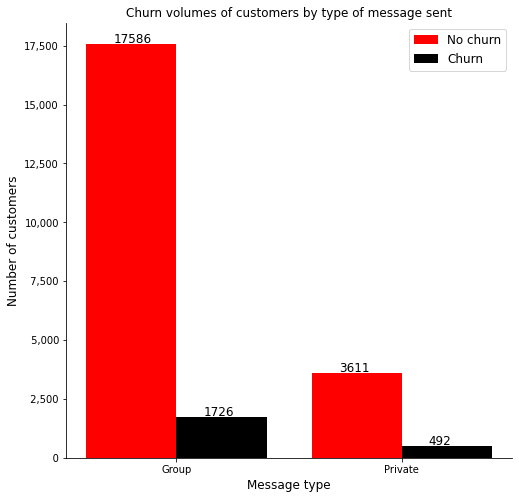

In [83]:
#plotting bar chart - churn rates are highest for private messages than group messages - 12% versus 9%
num_bars = 2
width = 0.4
labels = ['Group', 'Private']

message_type_bars = np.arange(num_bars)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

bar_1 = ax.bar(message_type_bars, message_type_pivot['count_No churn'], width, color = 'red', label = 'No churn')
bar_2 = ax.bar(message_type_bars + width, message_type_pivot['count_Churn'], width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#function to add comma separator to labels
def comma(x, pos): 
    return format(x, "6,.0f")

#adding data labels
for bar in bar_1:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.12, yval + 50, yval, fontsize = 12)
    
for bar in bar_2:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.12, yval + 50, yval, fontsize = 12)


ax.set_ylabel('Number of customers', fontsize = 12)
#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

ax.set_xlabel('Message type', fontsize = 12)
ax.set_xticks(message_type_bars + width / 2)
ax.set_xticklabels(labels)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers by type of message sent', fontsize = 12)
plt.savefig('churn_by_message_type')

In [84]:
#grouping week number and churn data and removing NAs
week_num = users_messages.groupby(['week_number', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
week_num = week_num[week_num.churned_after_six != 'NA']
week_num.head()

,week_number,churned_after_six,count
0,0,Churn,217
2,0,No churn,2122
3,1,Churn,660
5,1,No churn,6170
6,2,Churn,469


In [85]:
#pivoting the data for chart
week_num_pivot = week_num.pivot_table(columns = 'churned_after_six',
                           index = 'week_number',
                           aggfunc = 'sum').reset_index()
week_num_pivot

week_number count         
churned_after_six             Churn No churn
0                           0   217     2122
1                           1   660     6170
2                           2   469     4576
3                           3   300     3064
4                           4   222     2312
5                           5   183     1739
6                           6   167     1214

In [86]:
#creating one column title
week_num_pivot.columns = list(map('_'.join, week_num_pivot.columns))
week_num_pivot

,week_number_,count_Churn,count_No churn
0,0,217,2122
1,1,660,6170
2,2,469,4576
3,3,300,3064
4,4,222,2312
5,5,183,1739
6,6,167,1214


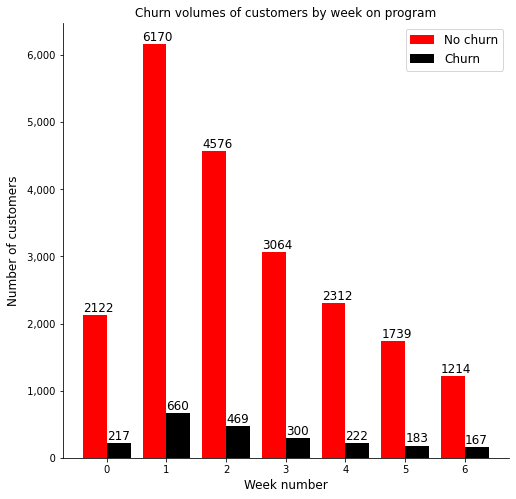

In [87]:
#plotting bar chart - churn levels highest in the first and second weeks
num_bars = 7
width = 0.4

week_num_bars = np.arange(num_bars)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

bar_1 = ax.bar(week_num_bars, week_num_pivot['count_No churn'], width, color = 'red', label = 'No churn')
bar_2 = ax.bar(week_num_bars + width, week_num_pivot['count_Churn'], width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#function to add comma separator to labels
def comma(x, pos): 
    return format(x, "6,.0f")

#adding data labels
for bar in bar_1:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.001, yval + 50, yval, fontsize = 12)
    
for bar in bar_2:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.001, yval + 50, yval, fontsize = 12)


ax.set_ylabel('Number of customers', fontsize = 12)
#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

ax.set_xlabel('Week number', fontsize = 12)
ax.set_xticks(week_num_bars + width / 2)
ax.set_xticklabels(week_num_pivot.week_number_)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers by week on program', fontsize = 12)
plt.savefig('churn_by_week_number')

In [88]:
#grouping questions and churn data and removing NAs
questions = users_messages.groupby(['questions_asked', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
questions = questions[questions.churned_after_six != 'NA'].reset_index(drop = True)
questions.head()

,questions_asked,churned_after_six,count
0,0.0,Churn,1919
1,0.0,No churn,18709
2,1.0,Churn,238
3,1.0,No churn,2011
4,2.0,Churn,45


In [89]:
#pivoting the data
questions_pivot = questions.pivot_table(columns = 'churned_after_six',
                           index = ['questions_asked'],
                           aggfunc = 'sum').reset_index()
questions_pivot

questions_asked count         
churned_after_six                 Churn No churn
0                             0.0  1919    18709
1                             1.0   238     2011
2                             2.0    45      347
3                             3.0    12       85
4                             4.0     2       28
5                             5.0     1       14
6                             6.0     1        3

In [90]:
#creating one column title - majority of customers do not ask questions and churn volumes are also high among these users
#not charting this as the 18,000 non-churners distort the data and make smaller values difficult to read
questions_pivot.columns = list(map('_'.join, questions_pivot.columns))
questions_pivot

,questions_asked_,count_Churn,count_No churn
0,0.0,1919,18709
1,1.0,238,2011
2,2.0,45,347
3,3.0,12,85
4,4.0,2,28
5,5.0,1,14
6,6.0,1,3


In [91]:
#grouping emojis and churn data and removing NAs
emojis = users_messages.groupby(['emojis_used', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
emojis = emojis[emojis.churned_after_six != 'NA'].reset_index(drop = True)
emojis.head()

,emojis_used,churned_after_six,count
0,0.0,Churn,1783
1,0.0,No churn,17482
2,1.0,Churn,380
3,1.0,No churn,2831
4,2.0,Churn,41


In [92]:
#pivoting the data
emojis_pivot = emojis.pivot_table(columns = 'churned_after_six',
                           index = ['emojis_used'],
                           aggfunc = 'sum').reset_index()
emojis_pivot

emojis_used   count         
churned_after_six               Churn No churn
0                         0.0  1783.0  17482.0
1                         1.0   380.0   2831.0
2                         2.0    41.0    602.0
3                         3.0     9.0    173.0
4                         4.0     4.0     70.0
5                         5.0     1.0     19.0
6                         6.0     NaN     11.0
7                         7.0     NaN      3.0
8                         8.0     NaN      5.0
9                         9.0     NaN      1.0

In [93]:
#replacing NaNs with 0
emojis_pivot = emojis_pivot.replace(np.nan, 0.0)

In [94]:
#creating one column title - majority of customers do not send emojis and churn volumes are also high among these users
emojis_pivot.columns = list(map('_'.join, emojis_pivot.columns))
emojis_pivot

,emojis_used_,count_Churn,count_No churn
0,0.0,1783.0,17482.0
1,1.0,380.0,2831.0
2,2.0,41.0,602.0
3,3.0,9.0,173.0
4,4.0,4.0,70.0
5,5.0,1.0,19.0
6,6.0,0.0,11.0
7,7.0,0.0,3.0
8,8.0,0.0,5.0
9,9.0,0.0,1.0


In [95]:
#grouping mentioned scales and churn data and removing NAs
scales = users_messages.groupby(['mentioned_scales', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
scales = scales[scales.churned_after_six != 'NA'].reset_index(drop = True)
scales.head()

,mentioned_scales,churned_after_six,count
0,0.0,Churn,2191
1,0.0,No churn,20840
2,1.0,Churn,23
3,1.0,No churn,337
4,2.0,Churn,4


In [96]:
#pivoting the data
scales_pivot = scales.pivot_table(columns = 'churned_after_six',
                           index = ['mentioned_scales'],
                           aggfunc = 'sum').reset_index()
scales_pivot

mentioned_scales   count         
churned_after_six                    Churn No churn
0                              0.0  2191.0  20840.0
1                              1.0    23.0    337.0
2                              2.0     4.0     17.0
3                              3.0     NaN      2.0
4                              5.0     NaN      1.0

In [97]:
#replacing NaNs with 0 - churn volumes fall when scales are mentioned more often - perhaps these users are more engaged 
#with the program
scales_pivot = scales_pivot.replace(np.nan, 0.0)
scales_pivot

mentioned_scales   count         
churned_after_six                    Churn No churn
0                              0.0  2191.0  20840.0
1                              1.0    23.0    337.0
2                              2.0     4.0     17.0
3                              3.0     0.0      2.0
4                              5.0     0.0      1.0

In [98]:
#grouping mentioned tracker and churn data and removing NAs
tracker = users_messages.groupby(['mentioned_tracker', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
tracker= tracker[tracker.churned_after_six != 'NA'].reset_index(drop = True)
tracker.head()

,mentioned_tracker,churned_after_six,count
0,0.0,Churn,2216
1,0.0,No churn,21084
2,1.0,Churn,2
3,1.0,No churn,108
4,2.0,No churn,5


In [99]:
#pivoting the data
tracker_pivot = tracker.pivot_table(columns = 'churned_after_six',
                           index = ['mentioned_tracker'],
                           aggfunc = 'sum').reset_index()
tracker_pivot

mentioned_tracker   count         
churned_after_six                     Churn No churn
0                               0.0  2216.0  21084.0
1                               1.0     2.0    108.0
2                               2.0     NaN      5.0

In [100]:
#replacing NaNs with 0
tracker_pivot = tracker_pivot.replace(np.nan, 0.0)
tracker_pivot

mentioned_tracker   count         
churned_after_six                     Churn No churn
0                               0.0  2216.0  21084.0
1                               1.0     2.0    108.0
2                               2.0     0.0      5.0

In [101]:
#creating dataframe to compare sentiment with questions asked
sentiment_questions = users_messages[['questions_asked', 'sentiment', 'churned_after_six']]
sentiment_questions.head()

,questions_asked,sentiment,churned_after_six
0,0.0,1.026933,NA
1,0.0,0.295621,NA
2,0.0,0.069245,NA
3,0.0,0.141559,NA
4,0.0,0.109137,NA


In [102]:
#removing the NAs from churn column
sentiment_questions= sentiment_questions[sentiment_questions.churned_after_six != 'NA'].reset_index(drop = True)

In [103]:
#pivoting the data
sentiment_questions_pivot = sentiment_questions.pivot_table(columns = 'churned_after_six',
                           index = ['questions_asked'],
                           values = 'sentiment').reset_index()
sentiment_questions_pivot

churned_after_six,questions_asked,Churn,No churn
0,0.0,0.160554,0.164324
1,1.0,0.086285,0.100046
2,2.0,0.114372,0.074546
3,3.0,0.054722,0.087766
4,4.0,0.162263,0.081528
5,5.0,0.114317,0.070867
6,6.0,-0.211830,0.011122


In [104]:
#converting questions asked data to integers for chart axis
sentiment_questions_pivot['questions_asked'] = sentiment_questions_pivot['questions_asked'].astype(int)

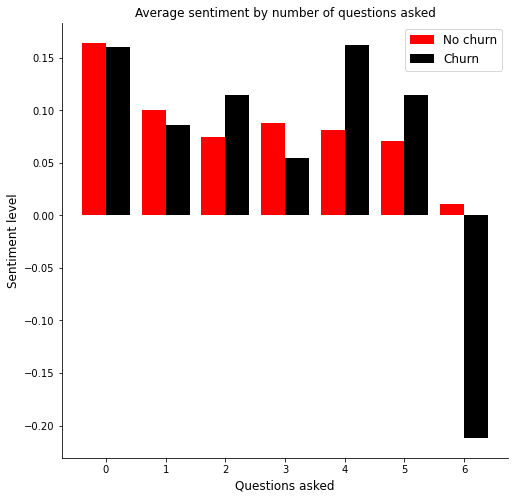

In [105]:
#plotting chart - sentiment is highest before any questions ar asked.Sentiment falls
#dramatically when 6 questions are asked but this is due to just one person

num_bars = 7
width = 0.4

sent_ques_bars = np.arange(num_bars)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

bar_1 = ax.bar(sent_ques_bars, sentiment_questions_pivot['No churn'], width, color = 'red', label = 'No churn')
bar_2 = ax.bar(sent_ques_bars + width, sentiment_questions_pivot['Churn'], width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Sentiment level', fontsize = 12)
ax.set_xlabel('Questions asked', fontsize = 12)
ax.set_xticks(sent_ques_bars + width / 2)
ax.set_xticklabels(sentiment_questions_pivot.questions_asked)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Average sentiment by number of questions asked', fontsize = 12)
plt.savefig('sentiment_by_questions')

In [106]:
#creating dataframe to compare sentiment with emojis
sentiment_emojis = users_messages[['emojis_used', 'sentiment', 'churned_after_six']]
sentiment_emojis.head()

,emojis_used,sentiment,churned_after_six
0,0.0,1.026933,NA
1,0.0,0.295621,NA
2,0.0,0.069245,NA
3,0.0,0.141559,NA
4,0.0,0.109137,NA


In [107]:
#removing the NAs from churn column
sentiment_emojis= sentiment_emojis[sentiment_emojis.churned_after_six != 'NA'].reset_index(drop = True)

In [108]:
#pivoting the data
sentiment_emojis_pivot = sentiment_emojis.pivot_table(columns = 'churned_after_six',
                           index = ['emojis_used'],
                           values = 'sentiment').reset_index()
sentiment_emojis_pivot

churned_after_six,emojis_used,Churn,No churn
0,0.0,0.129242,0.139500
1,1.0,0.234820,0.239325
2,2.0,0.273783,0.227311
3,3.0,0.172227,0.215560
4,4.0,0.548556,0.194247
5,5.0,0.029484,0.149057
6,6.0,NaN,0.294145
7,7.0,NaN,0.152852
8,8.0,NaN,0.328933
9,9.0,NaN,0.000443


In [109]:
#replacing NaNs with 0
sentiment_emojis_pivot = sentiment_emojis_pivot.replace(np.nan, 0.0)
#converting emoji data to integers for chart axis
sentiment_emojis_pivot['emojis_used'] = sentiment_emojis_pivot['emojis_used'].astype(int)
sentiment_emojis_pivot

churned_after_six,emojis_used,Churn,No churn
0,0,0.129242,0.139500
1,1,0.234820,0.239325
2,2,0.273783,0.227311
3,3,0.172227,0.215560
4,4,0.548556,0.194247
5,5,0.029484,0.149057
6,6,0.000000,0.294145
7,7,0.000000,0.152852
8,8,0.000000,0.328933
9,9,0.000000,0.000443


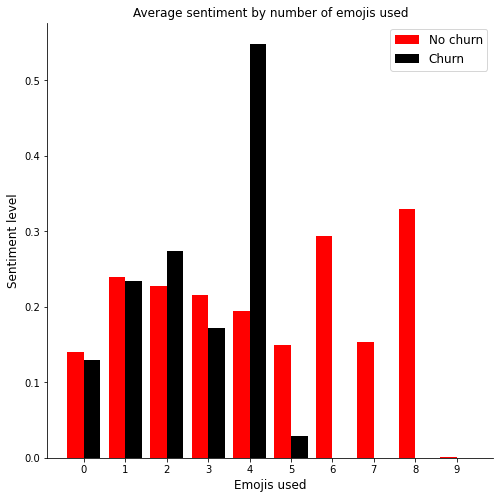

In [110]:
#plotting chart - high level of sentiment at 4 emojis despite churn but this consists of just 4 users. No churn and
#relatively high sentiment when 6 or more emojis are sent

num_bars = 10
width = 0.4

sent_emoj_bars = np.arange(num_bars)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

bar_1 = ax.bar(sent_emoj_bars, sentiment_emojis_pivot['No churn'], width, color = 'red', label = 'No churn')
bar_2 = ax.bar(sent_emoj_bars + width, sentiment_emojis_pivot['Churn'], width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Sentiment level', fontsize = 12)
ax.set_xlabel('Emojis used', fontsize = 12)
ax.set_xticks(sent_emoj_bars + width / 2)
ax.set_xticklabels(sentiment_emojis_pivot.emojis_used)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Average sentiment by number of emojis used', fontsize = 12)
plt.savefig('sentiment_by_emojis')

# **Exploratory data analysis - events table**

In [111]:
#merging users and events table - i was not able to join users, messages and events together - this was either giving me
#a memory issue or killing my kernal
users_events = users.merge(events, how = 'right', left_on = 'user_id', right_on = 'user_id')
users_events.head()

,user_id,goals,gender,motivation,challenge,trigger,age,height,weight,churned_after_six,title,week_on_programme
0,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NA,Added new food diary entry,0
1,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NA,Sent message,0
2,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NA,Sent message,0
3,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NA,Sent message,0
4,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NA,Read article,1


In [112]:
#grouping title and churn data and removing NAs
event = users_events.groupby(['title', 'churned_after_six']).size().to_frame().reset_index().rename(columns = {0: 'count'})
event = event[event.churned_after_six != 'NA'].reset_index(drop = True)
event.head()

,title,churned_after_six,count
0,Added new food diary entry,Churn,1095
1,Added new food diary entry,No churn,11265
2,Read article,Churn,830
3,Read article,No churn,10477
4,Saved recipe,Churn,83


In [113]:
#pivoting the data
event_pivot = event.pivot_table(columns = 'churned_after_six',
                           index = ['title'],
                           aggfunc = 'sum').reset_index()
event_pivot

title count         
churned_after_six                             Churn No churn
0                  Added new food diary entry  1095    11265
1                                Read article   830    10477
2                                Saved recipe    83     1003
3                                Sent message  2238    21284
4                                    Weigh-in   563     6820

In [114]:
#creating one column title
event_pivot.columns = list(map('_'.join, event_pivot.columns))
event_pivot

,title_,count_Churn,count_No churn
0,Added new food diary entry,1095,11265
1,Read article,830,10477
2,Saved recipe,83,1003
3,Sent message,2238,21284
4,Weigh-in,563,6820


In [115]:
#adding a total column for chart and sorting it by total
event_pivot['total'] = event_pivot['count_Churn'] + event_pivot['count_No churn']
event_pivot.sort_values(by = 'total', ascending = False, inplace = True)
event_pivot.reset_index(drop = True)

,title_,count_Churn,count_No churn,total
0,Sent message,2238,21284,23522
1,Added new food diary entry,1095,11265,12360
2,Read article,830,10477,11307
3,Weigh-in,563,6820,7383
4,Saved recipe,83,1003,1086


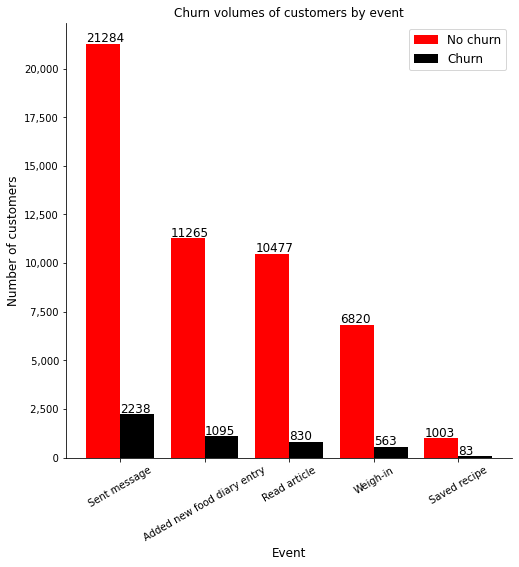

In [116]:
#plotting bar chart - churn levels are lowest for customers who saved a recipe or did a weigh-in 
num_bars = 5
width = 0.4

event_bars = np.arange(num_bars)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

bar_1 = ax.bar(event_bars, event_pivot['count_No churn'], width, color = 'red', label = 'No churn')
bar_2 = ax.bar(event_bars + width, event_pivot['count_Churn'], width, color = 'black', label = 'Churn')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#function to add comma separator to labels
def comma(x, pos): 
    return format(x, "6,.0f")

#adding data labels
for bar in bar_1:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.001, yval + 100, yval, fontsize = 12)
    
for bar in bar_2:
    yval = bar.get_height()
    ax.text(bar.get_x() + 0.001, yval + 100, yval, fontsize = 12)


ax.set_ylabel('Number of customers', fontsize = 12)
#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

ax.set_xlabel('Event', fontsize = 12)
ax.set_xticks(event_bars + width / 2)
ax.set_xticklabels(event_pivot.title_, rotation = 30)
ax.legend((bar_1, bar_2), ('No churn', 'Churn'), loc = 'upper right', fontsize = 12)
ax.set_title('Churn volumes of customers by event', fontsize = 12)
plt.savefig('churn_by_event')

In [117]:
#sending users_messages table to csv - this will be used for the prediction analysis in another jupyter notebook
all_data = users_messages.to_csv('/home/amybirdee/hobby_projects/health_first/all_data.csv', index = False)